# Demographic Data Analyzer

**Obj:** Using 1994 Census Data, analyze the demographics of this database

Notes: The boilerplate code given anlayzes data in a python file. To make debugging python code easier, we are using a ipython Jupyter Lab notebook. 


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import altair as alt

import warnings 
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

## Questions to Answer

* How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels. (race column)
* What is the average age of men?
* What is the percentage of people who have a Bachelor's degree?
* What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?
* What percentage of people without advanced education make more than 50K?
* What is the minimum number of hours a person works per week?
* What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?
* What country has the highest percentage of people that earn >50K and what is that percentage?
* Identify the most popular occupation for those who earn >50K in India.

## Data Imports

In [3]:
df = pd.read_csv('adult.data.csv')

In [4]:
# investigate data
print(df.dtypes)
print(df.describe())
print(len(df)) # 32k rows
df.head(3)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000   

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


## Analysis 

In [5]:
# How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.

race = df.race.value_counts()
race

race2 = race.to_frame()
race2['pct_of_total'] = round(race / sum(race) * 100, 1)
race2

,race,pct_of_total
White,27816,85.4
Black,3124,9.6
Asian-Pac-Islander,1039,3.2
Amer-Indian-Eskimo,311,1.0
Other,271,0.8


Roughly 85% of the census population is White. Is this Census data accurate? Of what population is it looking at? Only 32k samples means this data may be a sample of the original source. Becareful drawing conclusions from this dataset. 

In [6]:
# What is the average age of men?
print(df.sex.unique())
males = df[df.sex == 'Male']
average_age_men = round(males.age.mean(), 1)
print(average_age_men)
    

['Male' 'Female']
39.43354749885268


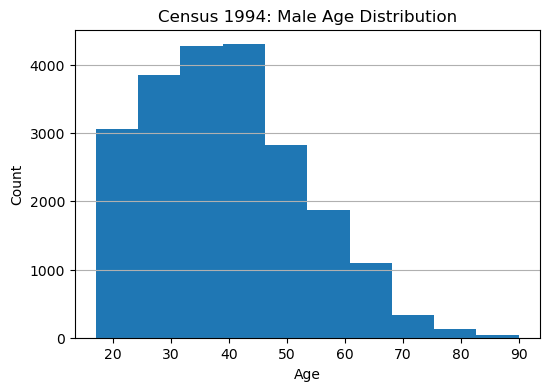

In [7]:
# let's plot the distribution of ages
fig, ax = plt.subplots(figsize=(6, 4))
male_dist = males.age.hist(ax=ax)
plt.title("Census 1994: Male Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(axis='x')

In [8]:
# note the interval of 25%, 50%, 75% 
print(males.age.describe())

# we can bin the data this way for quicker look
males['quantiles'] = pd.qcut(males.age, q=4)
males.quantiles.value_counts()

count    21790.000000
mean        39.433547
std         13.370630
min         17.000000
25%         29.000000
50%         38.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


(16.999, 29.0]    5725
(29.0, 38.0]      5477
(48.0, 90.0]      5420
(38.0, 48.0]      5168
Name: quantiles, dtype: int64

Census data includes only people ages 17 or older. Sample population has an average age of 40, most users skew younger. 
At a glance, we can see that 50% of users are under the age of 38. 

In [9]:
# What is the percentage of people who have a Bachelor's degree?
print(sorted(df.education.unique()))
percentage_bachelors = sum(df.education == 'Bachelors') / len(df)
print(percentage_bachelors)

['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']
0.16446055096587942


Here we can see that 16.4% of people in the Census have a Bachelors Degree

In [10]:
# clean up education labels, grouping people that are still in K-12 (Preschool to 12 grade)
df['education2'] = df.education.apply(lambda x : 'K-12' if x in ['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Preschool'] else x)

education_dist = df.education2.value_counts().to_frame()
# education_dist
education_dist['pct_of_total'] = round(education_dist['education2'] / sum(education_dist['education2']) * 100, 1)
education_dist

,education2,pct_of_total
HS-grad,10501,32.3
Some-college,7291,22.4
Bachelors,5355,16.4
K-12,4253,13.1
Masters,1723,5.3
Assoc-voc,1382,4.2
Assoc-acdm,1067,3.3
Prof-school,576,1.8
Doctorate,413,1.3


13.1% of users have education within K-12 still. Even though this is a population of users 17 or older. Could suggest some bugs in data collection or some people only finished preschool, which seems highly unlikely w/ this data. 

In [17]:
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
# What percentage of people without advanced education make more than 50K?

# data transformation and cleaning
df['education3'] = df.education.apply(lambda x : 'Advanced' if x in ['Bachelors', 'Masters', 'Doctorate'] else 'Not Advanced')
salary = df.groupby('education3').salary.value_counts().to_frame()
salary.columns = ['cnt']
salary.reset_index(drop=False, inplace=True)

# with and without `Bachelors`, `Masters`, or `Doctorate`
higher_education = salary[salary.education3 == 'Advanced']
lower_education = salary[salary.education3 == 'Not Advanced']
# add % of total
higher_education['pct_of_total'] = higher_education.cnt / sum(higher_education.cnt)
lower_education['pct_of_total'] = lower_education.cnt / sum(lower_education.cnt)

# percentage with salary >50K
higher_education_rich = round(higher_education[higher_education.salary == '>50K'].pct_of_total.iloc[0] * 100, 1) 
lower_education_rich = round(lower_education[lower_education.salary == '>50K'].pct_of_total.iloc[0] * 100, 1) 

print(f'Percent of people w/ advanced education making more than 50k: {higher_education_rich}')
# , lower_education_rich)
print(higher_education)
print(lower_education)

Percent of people w/ advanced education making more than 50k: 46.54
  education3 salary   cnt  pct_of_total
0   Advanced  <=50K  4005      0.534642
1   Advanced   >50K  3486      0.465358
     education3 salary    cnt  pct_of_total
2  Not Advanced  <=50K  20715      0.826286
3  Not Advanced   >50K   4355      0.173714


In [18]:

lower_education_rich

17.37

In [13]:
# What is the minimum number of hours a person works per week (hours-per-week feature)?
min_work_hours = min(df['hours-per-week'])
print("Minimum Hours Worked per Week:", min_work_hours)

# looking at the value counts, it seems that there is quite a range of values for hours worked per week
# df['hours-per-week'].value_counts()
print(df['hours-per-week'].describe()) # we also notice the max hours worked per week is 99 

def hr_buckets(hours):
    if hours > 80:
        return "> 80+ hours"
    elif hours > 40:
        return "> 40 hours"
    elif hours == 40: 
        return "40 hours"
    elif hours >= 20:
        return '>= 20 hours'
    else: 
        return '< 20 hours'
    
df['hours-per-week-buckets'] = df['hours-per-week'].apply(lambda x : hr_buckets(x))
buckets = df['hours-per-week-buckets'].value_counts().to_frame().reset_index()
buckets['pct_of_total'] = round(buckets['hours-per-week-buckets'] / sum(buckets['hours-per-week-buckets']) * 100)
buckets

Minimum Hours Worked per Week: 1
count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


,index,hours-per-week-buckets,pct_of_total
0,40 hours,15217,47.0
1,> 40 hours,9373,29.0
2,>= 20 hours,6059,19.0
3,< 20 hours,1704,5.0
4,> 80+ hours,208,1.0


It seems the minimum hours per week a person works is 1 hour. 

47% of people work 40 hours (the standard). Less than 5% of people work less than 20 hours and only 1% of people work over 80 hours.

In [14]:

# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
num_min_workers = df[df['hours-per-week'] == min_work_hours]
min_workers = df[df['hours-per-week'] == min_work_hours]['salary'] == '>50K'

rich_percentage = sum(min_workers) / len(min_workers) * 100
print('Percentage of people working 1 hour per week that make >50k :', f'{rich_percentage}%')

Percentage of people working 1 hour per week that make >50k : 10.0%


In [15]:
# What country has the highest percentage of people that earn >50K?

salaries = df.groupby('native-country')['salary'].value_counts().to_frame(name='user_cnt').reset_index()
df_salary = salaries.pivot(index='native-country', columns='salary', values='user_cnt')
df_salary['total_users'] = df_salary['>50K'] + df_salary['<=50K']
df_salary['pct_salary_50k_plus'] = round(df_salary['>50K'] / df_salary['total_users'] * 100, 1)
df_salary_sorted = df_salary.sort_values('pct_salary_50k_plus', ascending=False)

highest_earning_country = df_salary_sorted.head(1).index[0]
highest_earning_country_percentage = df_salary_sorted.head(1)['pct_salary_50k_plus'][0]
print(f"The country w/ the highest percentage of people earning >50k is {highest_earning_country} at {highest_earning_country_percentage}%. Sample Size: {df_salary_sorted.head(1)['total_users'][0]}")

The country w/ the highest percentage of people earning >50k is Iran at 42.0%. Sample Size: 43.0


In [16]:
# Identify the most popular occupation for those who earn >50K in India.
IN_df = df[(df['native-country'] == 'India') & (df['salary'] == '>50K')]
IN_df_occ = IN_df.occupation.value_counts().to_frame()
print(IN_df_occ)

top_IN_occupation = IN_df_occ.head(1).index[0]
print()
print(f"Most popular occupation in India making >50K: {top_IN_occupation}")

                  occupation
Prof-specialty            25
Exec-managerial            8
Other-service              2
Tech-support               2
Transport-moving           1
Sales                      1
Adm-clerical               1

Most popular occupation in India making >50K: Prof-specialty
